<a href="https://colab.research.google.com/github/Aya-Amin/Face-recognition/blob/master/Assignment_1_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification using LDA

### Data Load from google.drive

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1lAiosEECRFcWvc2rIEPbIe62YmCSSEI2'
fluff, id = link.split('=')
print (id) 
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('att_faces.zip')


    100% |████████████████████████████████| 993kB 21.6MB/s 
1lAiosEECRFcWvc2rIEPbIe62YmCSSEI2


### unzipping the downloaded file

In [0]:
from zipfile import ZipFile 
  
zip_ref = ZipFile('att_faces.zip', 'r')
zip_ref.extractall('att_faces/')
zip_ref.close()

#### Loading the Extracted Images 

In [0]:
from matplotlib import pyplot
data = []
for i in range(1 , 41):
    folder = str(i)
    for j in range(1,11):
        file = str(j)
        data.append(pyplot.imread('att_faces/'+'s'+folder+'/'+file +'.pgm'))
    
    



#### Reshaping all the images into 10304x1 vectors

In [0]:
for i in range(0 , 400):
    data[i] = data[i].reshape(10304)
print(data)

[array([48, 49, 45, ..., 47, 46, 46], dtype=uint8), array([60, 60, 62, ..., 32, 34, 34], dtype=uint8), array([39, 44, 53, ..., 29, 26, 29], dtype=uint8), array([63, 53, 35, ..., 41, 10, 24], dtype=uint8), array([64, 76, 80, ..., 35, 37, 39], dtype=uint8), array([ 43,  50,  41, ..., 158, 153, 169], dtype=uint8), array([41, 47, 47, ..., 35, 37, 38], dtype=uint8), array([44, 43, 32, ..., 43, 43, 37], dtype=uint8), array([42, 41, 44, ..., 42, 43, 41], dtype=uint8), array([34, 34, 33, ..., 37, 40, 33], dtype=uint8), array([ 35,  36,  37, ..., 144, 147, 143], dtype=uint8), array([37, 35, 35, ..., 26, 28, 28], dtype=uint8), array([30, 37, 35, ..., 26, 27, 32], dtype=uint8), array([34, 36, 35, ..., 32, 25, 25], dtype=uint8), array([35, 32, 36, ..., 25, 28, 29], dtype=uint8), array([34, 35, 35, ..., 31, 24, 24], dtype=uint8), array([ 38,  35,  36, ..., 138, 142, 141], dtype=uint8), array([ 34,  39,  35, ..., 135, 138, 148], dtype=uint8), array([ 43,  39,  36, ..., 154, 155, 141], dtype=uint8), 

### constructin a matrix for all images, each image in a row

In [0]:
import numpy as np
df = np.array(data)
print(df.shape)
print(df)

(400, 10304)
[[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 ...
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]
 [125 124 124 ...  36  35  34]]


### Generating the Labels

In [0]:
labels = []
for i in range(1,41):
    for j in range(1,11):
        labels.append(i)
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 2

### Checking an image sample

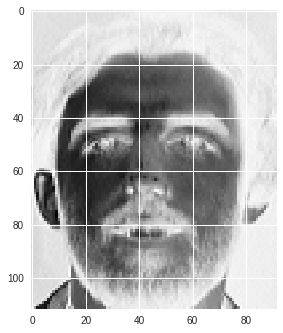

In [0]:
pyplot.imshow(data[100].reshape(112 , 92))

#### Splitting the data into 50% training and 50% testing

In [0]:
X_train = np.array(data)[list(range(0,400,2)),:]
Y_train = np.array(labels)[list(range(0,400,2))]

X_test = np.array(data)[list(range(1,400,2)),:]
Y_test = np.array(labels)[list(range(1,400,2))]
print(Y_train)

[ 1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 19 20
 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28 28 29 29 29 29
 29 30 30 30 30 30 31 31 31 31 31 32 32 32 32 32 33 33 33 33 33 34 34 34
 34 34 35 35 35 35 35 36 36 36 36 36 37 37 37 37 37 38 38 38 38 38 39 39
 39 39 39 40 40 40 40 40]


## Data Preprocessing (LDA)

### First: Separate each Class and claculate it's mean

In [0]:
classes_list = []
mean_list = []
for i in range(0,40):
  classes_list.append(X_train[i*5 : i*5 + 5])
  
  mean_list.append([np.mean(classes_list[i],axis = 0)])
  
mean_list = np.array(mean_list)


##### Calculating the mean of all the Data

In [0]:
mean_data = np.mean(X_train,axis = 0)


In [0]:
mean_data = np.array([mean_data])
print(mean_data.shape)

(1, 10304)


##### Claculating Sb (between classes Scatter matrix)

In [0]:
sb =  len(classes_list[0])*      np.dot((mean_list[0] - mean_data).T ,(mean_list[0] - mean_data))
print(sb)
for i in range(1,40):
    
    sb +=  len(classes_list[i]) *np.dot((mean_list[i] - mean_data).T ,(mean_list[i] - mean_data))
 
print(sb.shape)


In [0]:
 not False in (np.abs(sb-sb.T) < 1e-8)

True

In [0]:
print(sb)

[[221513.555 220621.705 218488.645 ... -16726.5   -21288.885 -10780.955]
 [220621.705 220582.155 218178.495 ... -18392.1   -22588.335 -11850.305]
 [218488.645 218178.495 216305.155 ... -18975.3   -23655.315 -13299.645]
 ...
 [-16726.5   -18392.1   -18975.3   ... 298757.2   305832.7   291714.1  ]
 [-21288.885 -22588.335 -23655.315 ... 305832.7   318949.395 305942.485]
 [-10780.955 -11850.305 -13299.645 ... 291714.1   305942.485 300057.155]]


In [0]:
print(classes_list[0].shape)

(5, 10304)


#### alculating the Covariance matrix for each class, and Sw

In [0]:
Sw = np.zeros((10304,10304))
for  c in classes_list:
  Sw += (np.cov(c,rowvar =False , bias = True ))
 
#print(cov_list[i])



In [0]:
Sw_inv = np.linalg.inv(Sw)

### Computing EigenValues and Eigenvectors for Sw_inv * Sb

In [0]:
eigenValuesh , eignVectorsh = np.linalg.eigh(np.matmul(Sw_inv , sb))

In [0]:
print(eigenValuesh)
print(eignVectorsh)


[-1.28908036e+20 -4.97452454e+19 -3.39371077e+19 ...  3.43054270e+19
  4.94648290e+19  1.29391886e+20]
[[-0.00873202 -0.01221486  0.01377822 ... -0.013032    0.01164344
   0.00867189]
 [-0.00842419 -0.01176132  0.01370852 ... -0.01310776  0.01128342
   0.00838745]
 [-0.00866147 -0.01213497  0.01341383 ... -0.01254052  0.01148777
   0.00857751]
 ...
 [-0.02335856  0.01498586 -0.01296042 ... -0.0141392   0.01508474
  -0.0230595 ]
 [ 0.0230555  -0.01658593  0.00269854 ...  0.00405695 -0.01710425
   0.02278462]
 [-0.00216219  0.00019704 -0.00811643 ... -0.00805226  0.00013865
  -0.00211484]]


### Sorting EigenValues & Eigenvectors

In [0]:

sev = eigenValuesh.argsort()[::-1] #returns the indices one would use to sort the array.
eigenValues = eigenValuesh[sev]
eignVectors = eignVectorsh[:,sev]
print(eigenValues)
print(eignVectors)


[ 1.29391886e+20  4.94648290e+19  3.43054270e+19 ... -3.39371077e+19
 -4.97452454e+19 -1.28908036e+20]
[[ 0.00867189  0.01164344 -0.013032   ...  0.01377822 -0.01221486
  -0.00873202]
 [ 0.00838745  0.01128342 -0.01310776 ...  0.01370852 -0.01176132
  -0.00842419]
 [ 0.00857751  0.01148777 -0.01254052 ...  0.01341383 -0.01213497
  -0.00866147]
 ...
 [-0.0230595   0.01508474 -0.0141392  ... -0.01296042  0.01498586
  -0.02335856]
 [ 0.02278462 -0.01710425  0.00405695 ...  0.00269854 -0.01658593
   0.0230555 ]
 [-0.00211484  0.00013865 -0.00805226 ... -0.00811643  0.00019704
  -0.00216219]]


#### plotting the first c-1 EigenValues

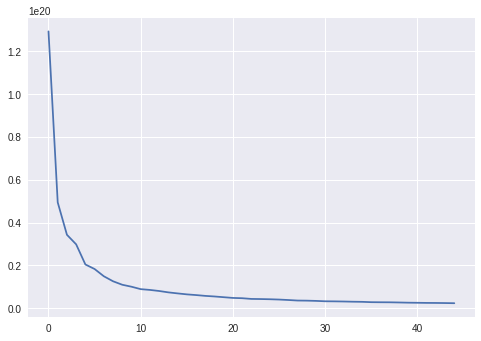

[1.29391886e+20 4.94648290e+19 3.43054270e+19 2.98337949e+19
 2.04265956e+19 1.82983506e+19 1.49172160e+19 1.25711968e+19
 1.09456536e+19 1.00257213e+19 8.89043772e+18 8.52832173e+18
 8.02461053e+18 7.38072349e+18 6.89983934e+18 6.45058946e+18
 6.12458344e+18 5.74124701e+18 5.46660733e+18 5.12348847e+18
 4.78348861e+18 4.65282179e+18 4.31822507e+18 4.25967239e+18
 4.16773032e+18 4.02504063e+18 3.81224853e+18 3.56326803e+18
 3.51498536e+18 3.39752366e+18 3.21756788e+18 3.18044885e+18
 3.11375354e+18 3.01735118e+18 2.95903199e+18 2.79737514e+18
 2.75901989e+18 2.73631583e+18 2.65766427e+18 2.56489501e+18
 2.51620198e+18 2.45763531e+18 2.43504146e+18 2.38544616e+18
 2.31523634e+18]


In [0]:
from matplotlib import pyplot as py
py.plot(range(0,45),eigenValues[0:45] )

py.show()
print(eigenValues[0:45])

#### Plotting the Variance explained by the first 39 Vectors

-4.89671139120513e+17


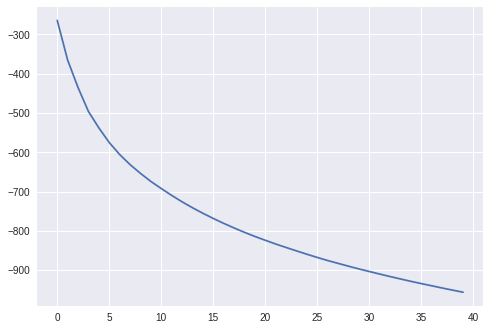

In [0]:
total_variance = np.sum(eigenValues)
print(total_variance)
list_variance = []
sum = 0
for i in range(0,40):
  sum +=eigenValues[i]
  list_variance.append(sum)
  
py.plot(range(0,40),list_variance/total_variance)

py.show()

### Setting the Projection vectors (c-1) vectors

In [0]:
projection_vectors = eignVectors[:,0:39]
#projection_vectors = np.real(projection_vectors)
print(projection_vectors.shape)
print(projection_vectors[0])

(10304, 39)
[ 8.67188919e-03  1.16434369e-02 -1.30320044e-02  1.07628048e-02
  4.53690426e-03 -1.15098045e-02  1.47589113e-02 -1.59340179e-02
  1.00709424e-02 -4.69399493e-03  1.72026015e-02 -2.12359808e-02
  1.52331996e-02 -5.98420188e-04  1.79938844e-02 -2.26162395e-02
  1.48986903e-02 -4.73590446e-03  2.49206705e-02 -6.53576152e-03
  6.81155708e-03 -6.43447417e-03  1.98545441e-02 -3.44142128e-02
  6.20100796e-03 -8.30557948e-03  2.69311878e-04  5.76912420e-03
  6.80278234e-03 -3.39085846e-02  2.03090106e-02  2.48733418e-02
 -1.70015624e-02 -8.39180879e-05 -3.12987469e-02  1.02095960e-02
 -2.48549634e-02  8.03450723e-03 -5.85799407e-02]


### Projecting the Data

In [0]:
Z_train_projected = np.matmul(projection_vectors.T ,(X_train).T ).T
print(Z_train_projected.shape)


(200, 39)


In [0]:
Z_test_projected = np.matmul(projection_vectors.T ,(X_test).T ).T
print(Z_test_projected.shape)

(200, 39)


### Classification :-


k =  1
-------
Accuracy: 
0.95
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.80      0.80      0.80         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       0.83      1.00      0.91         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5
          16       0.71      1.00      0.83         5
    

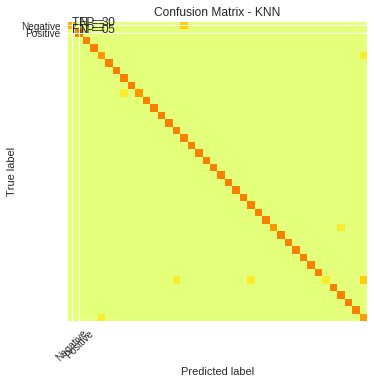


k =  3
-------
Accuracy: 
0.895
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       1.00      1.00      1.00         5
           3       0.71      1.00      0.83         5
           4       1.00      1.00      1.00         5
           5       0.57      0.80      0.67         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.62      1.00      0.77         5
          15       0.71      1.00      0.83         5
          16       1.00      0.60      0.75         5
   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


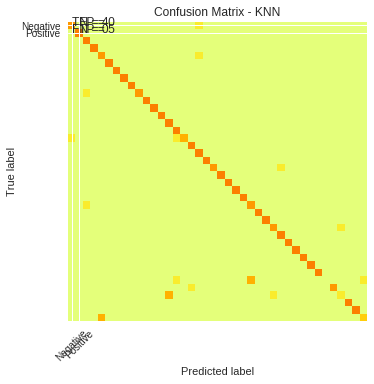


k =  5
-------
Accuracy: 
0.84
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.83      1.00      0.91         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.57      0.80      0.67         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.62      1.00      0.77         5
          15       0.50      0.60      0.55         5
          16       1.00      0.60      0.75         5
    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


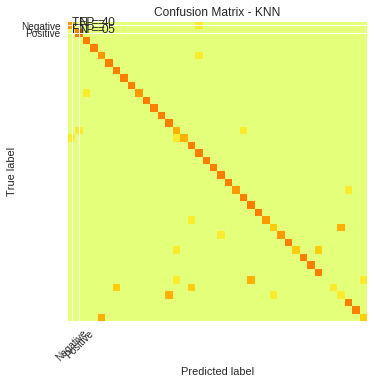


k =  7
-------
Accuracy: 
0.8
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         5
           4       0.83      1.00      0.91         5
           5       0.60      0.60      0.60         5
           6       1.00      1.00      1.00         5
           7       0.62      1.00      0.77         5
           8       0.83      1.00      0.91         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.62      1.00      0.77         5
          15       0.50      0.40      0.44         5
          16       0.75      0.60      0.67         5
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


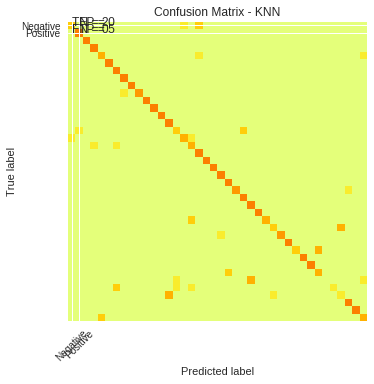

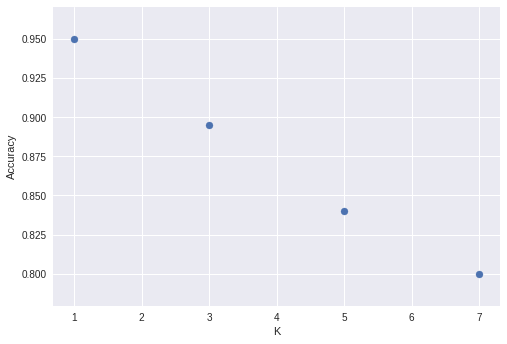

-------------------------------------------------------------------------------------------------------------



In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
  
K = [1,3,5,7]
accuracy_list = []
accuracy = np.ones((4,1))
for k in K:
    print('\nk = ', k)
    print('-------')
    
    
    clf = KNeighborsClassifier(n_neighbors = k,algorithm  = 'auto')
    clf.fit(Z_train_projected, Y_train)
  
    Y_pred = clf.predict(Z_test_projected)

   
    print('Accuracy: ')
    accuracy2 = accuracy_score(Y_test, Y_pred)
    accuracy_list.append(accuracy2)
    print(accuracy2)
    accuracy[K.index(k)] = accuracy_score(Y_test, Y_pred)
    print('confusion matrix: \n')
    #print(confusion_matrix(Y_test, Y_pred))
    print('Classification report: \n')
    print(classification_report(Y_test, Y_pred))
    ## Plotting the Confusion Matrix
    cm = confusion_matrix(Y_test, Y_pred)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative', 'Positive']
    plt.title('Confusion Matrix - KNN')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
  
K = np.array(K)
plt.scatter(K, accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()
print('-------------------------------------------------------------------------------------------------------------\n')
  

### Classification using Crossvlidation and 5-Folds

Best parameters set found on development set:

{'n_neighbors': 1}

best Score: 

0.925
0.925 (+/-0.055) for {'n_neighbors': 1}
0.860 (+/-0.136) for {'n_neighbors': 3}
0.800 (+/-0.071) for {'n_neighbors': 5}
0.730 (+/-0.111) for {'n_neighbors': 7}
Accuracy: 
0.95
confusion matrix: 

Classification report: 

              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.80      0.80      0.80         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       0.83      1.00      0.91         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00

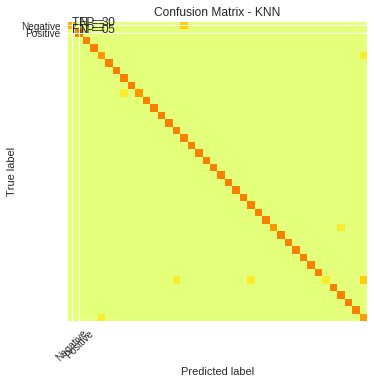

In [0]:
    from sklearn.model_selection import GridSearchCV  
    clf_knn = KNeighborsClassifier(n_neighbors = k,algorithm  = 'auto')
    param = [{'n_neighbors' : [1,3,5,7]}]
    
    score = ['precision', 'recall'  ]
    clf =  GridSearchCV(clf_knn,param, cv=5,scoring='accuracy')
    clf.fit(Z_train_projected, Y_train)
  
    Y_pred = clf.predict(Z_test_projected)
  
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)   
    print()
    print("best Score: ")
    print()
    print(clf.best_score_)
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        
    print('Accuracy: ')
    accuracy2 = accuracy_score(Y_test, Y_pred)
    
    print(accuracy2)
    
    print('confusion matrix: \n')
    #print(confusion_matrix(Y_test, Y_pred))
    print('Classification report: \n')
    print(classification_report(Y_test, Y_pred))
    ## Plotting the Confusion Matrix
    cm = confusion_matrix(Y_test, Y_pred)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative', 'Positive']
    plt.title('Confusion Matrix - KNN')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()